Import Library
Pada tahap ini, kita mengimpor berbagai pustaka yang dibutuhkan, termasuk untuk manipulasi data, visualisasi, dan penerapan model machine learning.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

Membaca Dataset
Dataset dibaca menggunakan pd.read_csv dari lokasi yang diberikan.

In [58]:
# Gantilah path sesuai dengan lokasi file yang Anda upload di Google Colab
data = pd.read_csv('/content/data.csv')

Informasi Dataset dan Pemeriksaan Nilai Kosong
Informasi tentang dataset seperti jumlah baris dan kolom, tipe data, statistik deskriptif, serta jumlah nilai yang hilang ditampilkan.

In [59]:
# Informasi awal tentang dataset
print(data.info())
print(data.describe())

# Cek nilai kosong
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Visualisasi Distribusi Fitur
Menampilkan histogram untuk melihat distribusi setiap fitur.

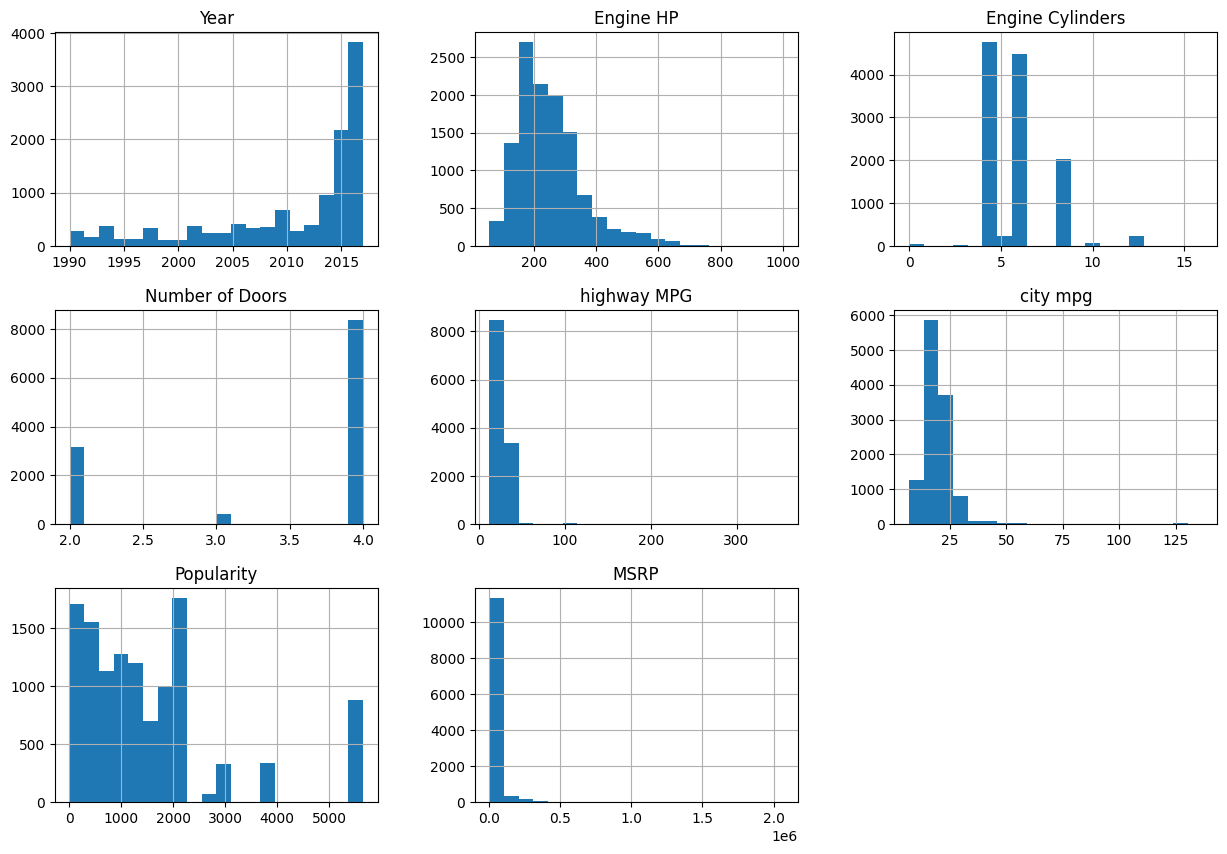

In [60]:
# Visualisasi distribusi setiap fitur
data.hist(bins=20, figsize=(15, 10))
plt.show()

Visualisasi Korelasi Antar Variabel
Heatmap korelasi dibuat untuk melihat hubungan antar fitur numerik.

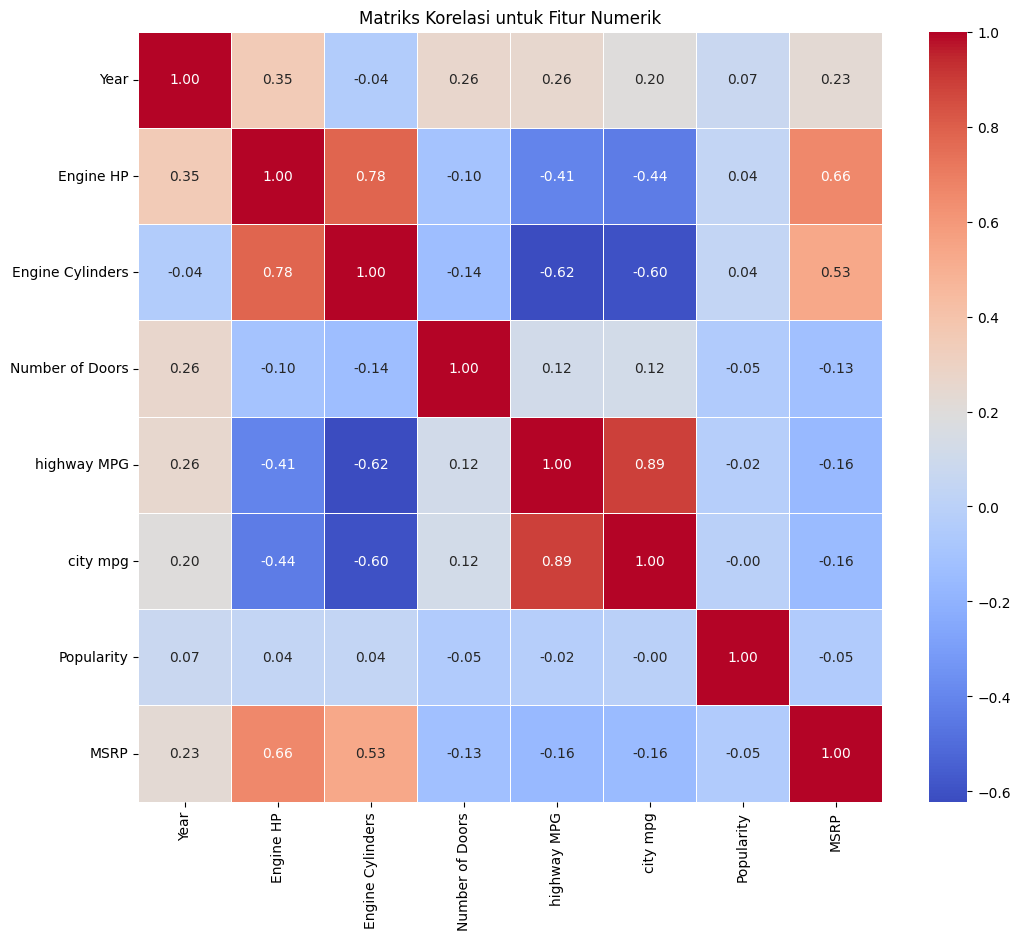

In [61]:
# Visualisasi Korelasi Antar Variabel untuk seluruh dataset numerik
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik")
plt.show()

Memilih Fitur Numerik
Menghapus kolom non-numerik agar analisis korelasi lebih mudah.

In [62]:
# Menghapus kolom non-numerik untuk visualisasi korelasi
data_numeric = data.select_dtypes(include=[np.number])

Preprocessing Data (Encoding, Imputasi, dan Split)

* Fitur MSRP dipisahkan sebagai target (y).
* Fitur kategorikal dikonversi ke bentuk numerik dengan One-Hot Encoding.
* Nilai kosong diimputasi dengan rata-rata.
* Dataset dibagi menjadi data latih dan data uji.

In [63]:
# Definisikan kembali variabel X dan y
X = data.drop('MSRP', axis=1)
y = data['MSRP']

# Konversi kolom kategorikal menjadi bentuk numerik dengan One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Ubah kolom boolean menjadi tipe integer jika ada
X = X.astype({col: int for col in X.select_dtypes(include=[bool]).columns})

# Imputasi untuk mengisi nilai NaN di seluruh kolom numerik
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data latih dan uji untuk verifikasi
print("Data latih:", X_train.shape, y_train.shape)
print("Data uji:", X_test.shape, y_test.shape)

Data latih: (9531, 1071) (9531,)
Data uji: (2383, 1071) (2383,)


Membangun Model Regresi Linear

* Model regresi linear dilatih dengan data latih.
* Hasil prediksi dievaluasi menggunakan RMSE, MSE, dan R-squared.

In [64]:
# Membuat dan melatih model regresi linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Memprediksi pada data uji
y_pred_lin = lin_reg.predict(X_test)

# Menghitung metrik evaluasi
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Regresi Linear Biasa:")
print(f"RMSE: {rmse_lin}")
print(f"MSE: {mse_lin}")
print(f"R-squared: {r2_lin}")

Regresi Linear Biasa:
RMSE: 10231.001998517242
MSE: 104673401.8936638
R-squared: 0.9560854504670936


Visualisasi Koefisien Fitur
Menampilkan koefisien untuk 10 fitur dengan pengaruh terbesar dan terkecil.

<ipython-input-65-7f099cc3ebf9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefficients['Coefficient'], y=top_coefficients.index, palette="viridis")


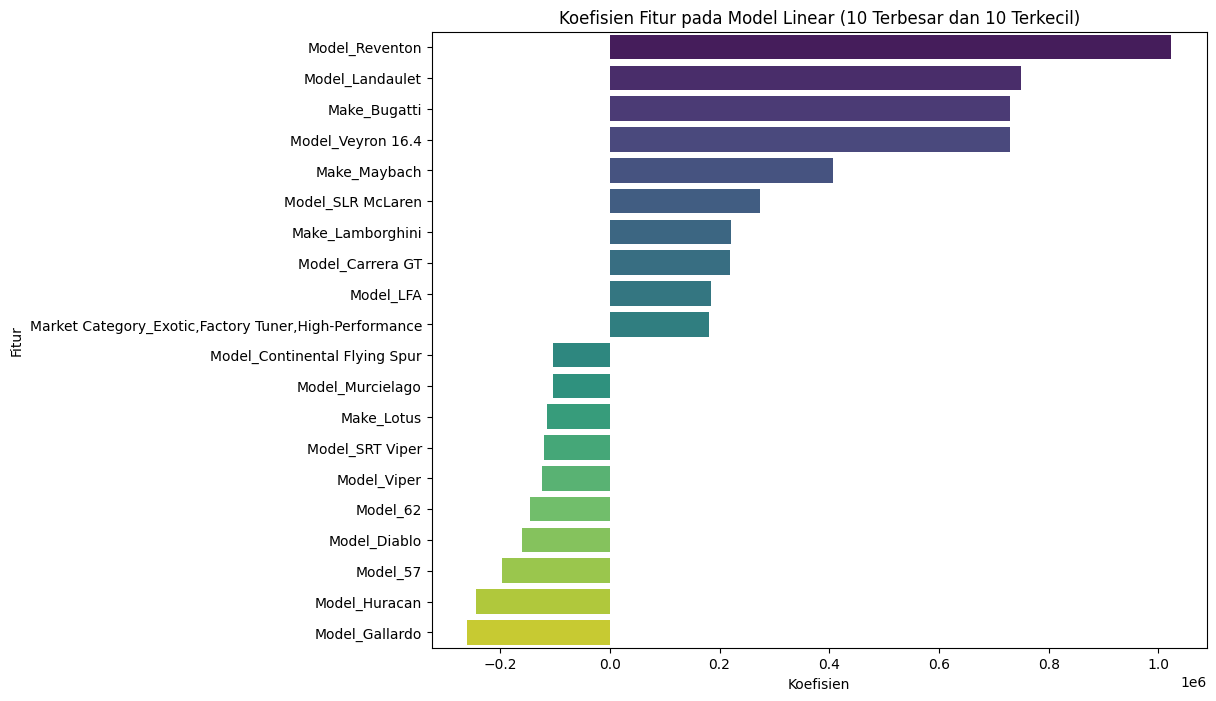

In [65]:
# Menampilkan hanya 10 fitur dengan koefisien terbesar dan 10 fitur dengan koefisien terkecil
top_n = 10
top_coefficients = pd.concat([coefficients.head(top_n), coefficients.tail(top_n)])

plt.figure(figsize=(10, 8))
sns.barplot(x=top_coefficients['Coefficient'], y=top_coefficients.index, palette="viridis")
plt.title("Koefisien Fitur pada Model Linear (10 Terbesar dan 10 Terkecil)")
plt.xlabel("Koefisien")
plt.ylabel("Fitur")
plt.show()

Pembuatan Model Polinomial dengan Fitur Terpenting

* emilih fitur dengan korelasi tinggi terhadap target.
* Menggunakan fitur tersebut untuk membuat model dengan basis polinomial (derajat 2).
* Model dilatih dan dievaluasi dengan data polinomial.

In [66]:
# Pilih kolom numerik untuk korelasi
data_numeric = data.select_dtypes(include=[np.number])
correlation_matrix = data_numeric.corr()

# Pilih fitur yang memiliki korelasi tinggi dengan target
important_features = correlation_matrix[correlation_matrix['MSRP'].abs() > 0.5].index.tolist()
important_features.remove('MSRP')  # Buang kolom target dari daftar fitur penting

# Mendefinisikan X_train dan X_test dengan subset fitur penting
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Terapkan PolynomialFeatures derajat 2 pada subset data penting ini
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_important)
X_poly_test = poly.transform(X_test_important)

# Membuat dan melatih model regresi linear dengan fitur polinomial
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_train, y_train)

# Memprediksi pada data uji
y_pred_poly = lin_reg_poly.predict(X_poly_test)

# Menghitung metrik evaluasi
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nRegresi Linear dengan Basis Polinomial:")
print(f"RMSE: {rmse_poly}")
print(f"MSE: {mse_poly}")
print(f"R-squared: {r2_poly}")


Regresi Linear dengan Basis Polinomial:
RMSE: 26322.58420045274
MSE: 692878438.9899242
R-squared: 0.7093106369064348


Distribusi Kesalahan Prediksi
Menampilkan histogram distribusi kesalahan prediksi untuk model linear dan polinomial.

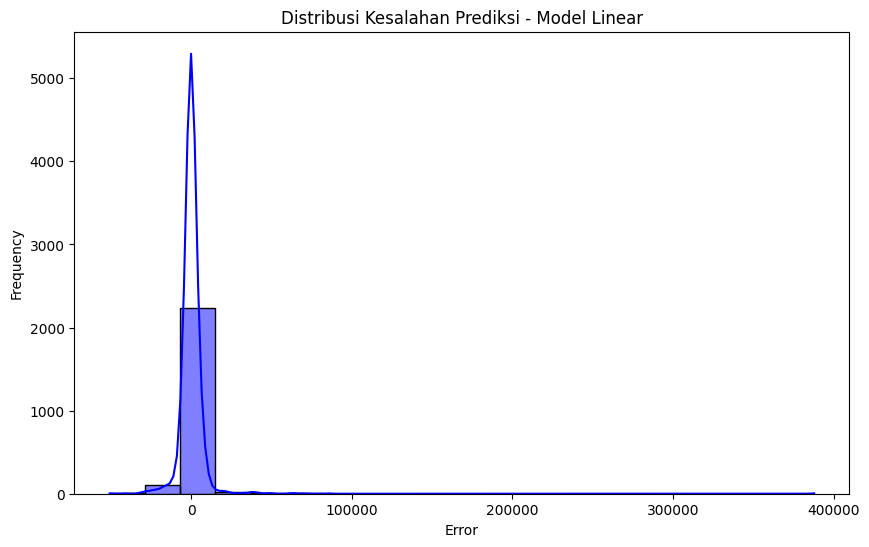

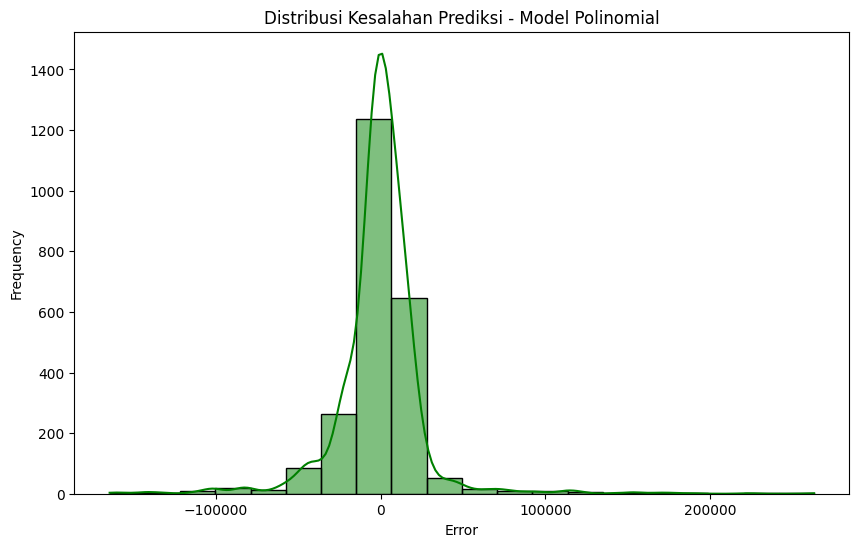

In [67]:
# Distribusi Kesalahan untuk Model Linear
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_lin, kde=True, color="blue", bins=20)
plt.title("Distribusi Kesalahan Prediksi - Model Linear")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Distribusi Kesalahan untuk Model Polinomial
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_poly, kde=True, color="green", bins=20)
plt.title("Distribusi Kesalahan Prediksi - Model Polinomial")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

Perbandingan Prediksi vs. Nilai Sebenarnya
Menampilkan scatter plot untuk melihat sejauh mana prediksi mendekati nilai sebenarnya.

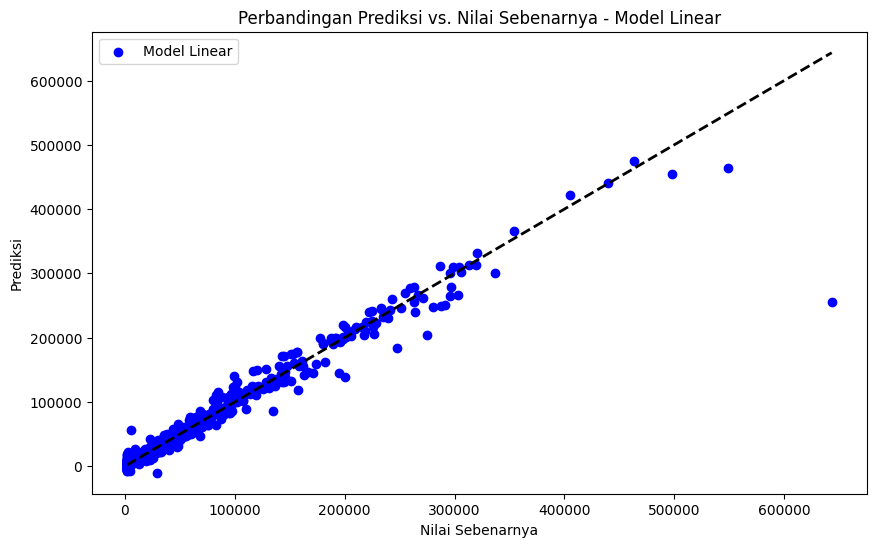

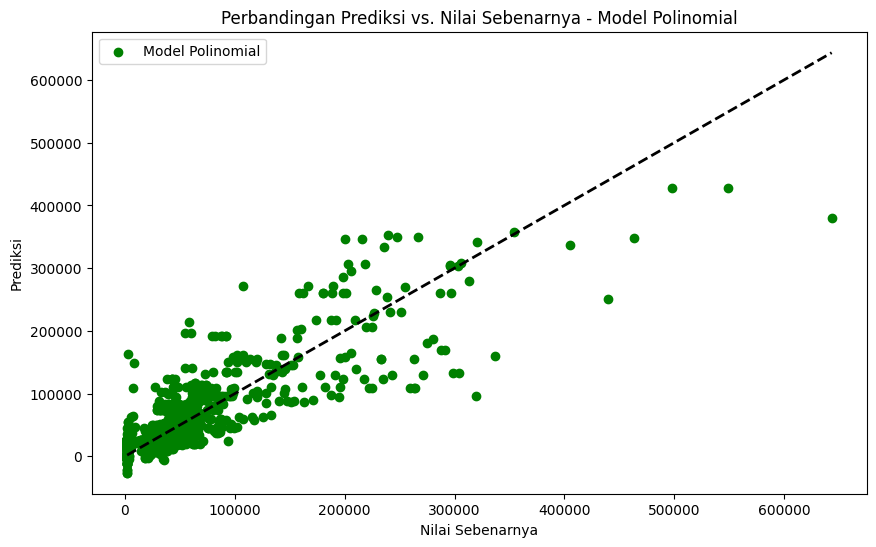

In [68]:
# Perbandingan Prediksi vs. Nilai Sebenarnya untuk Model Linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label="Model Linear")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Perbandingan Prediksi vs. Nilai Sebenarnya - Model Linear")
plt.legend()
plt.show()

# Perbandingan Prediksi vs. Nilai Sebenarnya untuk Model Polinomial
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='green', label="Model Polinomial")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Perbandingan Prediksi vs. Nilai Sebenarnya - Model Polinomial")
plt.legend()
plt.show()


Perbandingan Kinerja Model
Membuat tabel perbandingan metrik kinerja (RMSE, MSE, R-squared) antara model linear dan model polinomial.

In [69]:
comparison = pd.DataFrame({
    'Model': ['Regresi Linear Biasa', 'Regresi Linear dengan Basis Polinomial'],
    'RMSE': [rmse_lin, rmse_poly],
    'MSE': [mse_lin, mse_poly],
    'R-squared': [r2_lin, r2_poly]
})
print("\nPerbandingan Model:")
print(comparison)



Perbandingan Model:
                                    Model          RMSE           MSE  \
0                    Regresi Linear Biasa  10231.001999  1.046734e+08   
1  Regresi Linear dengan Basis Polinomial  26322.584200  6.928784e+08   

   R-squared  
0   0.956085  
1   0.709311  
